In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import and read the dataset 
data = pd.read_csv('WHO-COVID-19-global-table-dataset.csv')
data.head()

,Count,Country,WHO Region,Cases - cumulative total,Deaths - cumulative total
0,1,United States,Americas,85007630,1002946
1,2,India,South-East Asia,43270577,524817
2,3,Brazil,Americas,31611769,668693
3,4,France,Europe,29114200,145662
4,5,Germany,Europe,27124689,140118


In [3]:
#checking the shape of data 
data.shape

(236, 5)

In [4]:
# null value in the dataset
data.isnull().sum()

Count                        0
Country                      0
WHO Region                   0
Cases - cumulative total     0
Deaths - cumulative total    0
dtype: int64

In [5]:
#total Regions and Countries in Covid19 dataset
n_country = len(data['Country'].unique())
n_region = len(data['WHO Region'].unique())
print(f'In this dataset there are {n_country} countries from {n_region} regions')

In this dataset there are 236 countries from 7 regions


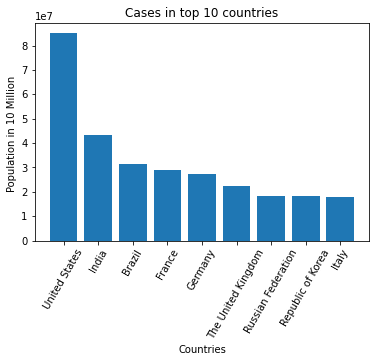

In [6]:
#Top 10 countries Cases reported population based (Bar plot)
plt.bar(data['Country'][:9],data['Cases - cumulative total'][:9])
plt.xlabel("Countries")
plt.xticks(rotation=60)
plt.ylabel("Population in 10 Million ")
plt.title("Cases in top 10 countries")
plt.show()

              WHO Region  Deaths - cumulative total
0                 Africa                     173179
1               Americas                    2752954
2  Eastern Mediterranean                     343369
3                 Europe                    2020869
4                  Other                         13
5        South-East Asia                     789407
6        Western Pacific                     235181


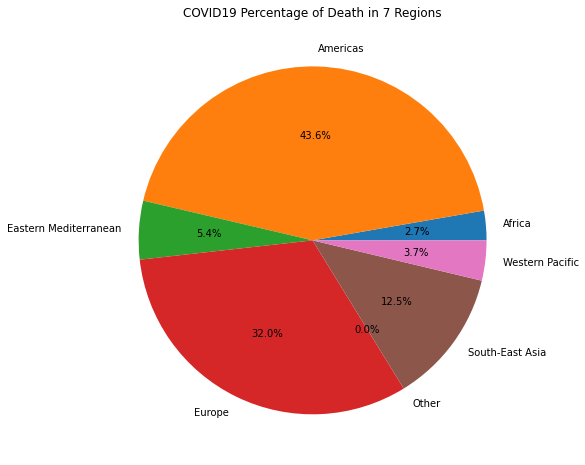

In [8]:
#Covid19 death cases in all Regions (pie representation)
region_cases = data.groupby(['WHO Region'], as_index=False)['Deaths - cumulative total'].sum()
print(region_cases)

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

plt.pie(region_cases['Deaths - cumulative total'],labels = region_cases['WHO Region'],autopct='%2.1f%%')
plt.title("COVID19 Percentage of Death in 7 Regions")
plt.show()

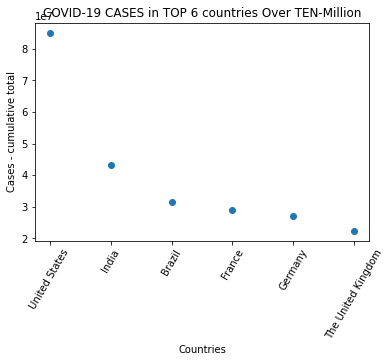

In [9]:
#Cases of COVID-19 in top countries (scatter plot)
plt.scatter(data['Country'][:6],data['Cases - cumulative total'][:6])
plt.xlabel("Countries")
plt.xticks(rotation=60)
plt.ylabel("Cases - cumulative total")
plt.title("COVID-19 CASES in TOP 6 countries Over TEN-Million")
plt.show()

In [10]:
#calculating the mean of COVID-19 cases
Region_mean = data.groupby(['WHO Region'], as_index=False)['Cases - cumulative total'].mean()
Region_mean

,WHO Region,Cases - cumulative total
0,Africa,1.813858e+05
1,Americas,2.861641e+06
2,Eastern Mediterranean,9.932155e+05
3,Europe,3.668525e+06
4,Other,7.640000e+02
5,South-East Asia,5.300534e+06
6,Western Pacific,1.788725e+06


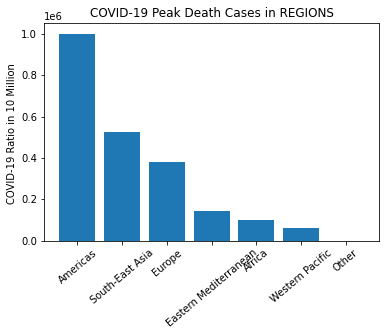

In [11]:
# COVID-19 Death cases in Region
reg_t = data.groupby(['WHO Region'])['Deaths - cumulative total'].transform(max) == data['Deaths - cumulative total']
data[reg_t]

peak_Country = data[reg_t]['Country'].to_list()
peak_Region = data[reg_t]['WHO Region'].to_list()
peak_Deaths = data[reg_t]['Deaths - cumulative total'].to_list()

plt.bar(peak_Region,peak_Deaths)
plt.ylabel("COVID-19 Ratio in 10 Million ")
plt.xticks(rotation=40)

plt.title("COVID-19 Peak Death Cases in REGIONS")
plt.show()

In [12]:
#Region peak cases of death occured in country 
for r in range(6):
    print(f' In {peak_Country[r]} region {peak_Region[r]} COVID-19 death cases are {peak_Deaths[r]}')

 In United States region Americas COVID-19 death cases are 1002946
 In India region South-East Asia COVID-19 death cases are 524817
 In Russian Federation region Europe COVID-19 death cases are 380333
 In Iran (Islamic Republic of) region Eastern Mediterranean COVID-19 death cases are 141357
 In South Africa region Africa COVID-19 death cases are 101584
 In Philippines region Western Pacific COVID-19 death cases are 60461
